In [ ]:
Extracting landmarks from detected faces

In [17]:
import torch #To work on tensors
import os  # Import the library that allows us to access photos from our computer.
import cv2  # Load the OpenCV library, commonly used in many image processing projects.
from facenet_pytorch import MTCNN  # Load the MTCNN library based on PyTorch for face detection.
import matplotlib.pyplot as plt  # Used for data visualization.


In [18]:
# Determine device and initialize MTCNN for face detection
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(device=device)

In [22]:
# Showing image path
folder_path = r'C:\Users\SERACEDDIN\Desktop\github'

depositphotos_653475304-stock-photo-group-multiracial-young-student-people.jpg:
Left eye position:  [499.8258972167969 179.45956420898438]
Right eye position:  [546.2447509765625 172.30169677734375]
depositphotos_653475304-stock-photo-group-multiracial-young-student-people.jpg:
Left eye position:  [120.92854309082031 171.26992797851562]
Right eye position:  [167.08555603027344 176.14532470703125]
depositphotos_653475304-stock-photo-group-multiracial-young-student-people.jpg:
Left eye position:  [283.6177062988281 205.4810791015625]
Right eye position:  [327.4430847167969 205.18887329101562]
depositphotos_653475304-stock-photo-group-multiracial-young-student-people.jpg:
Left eye position:  [215.4550018310547 157.5571746826172]
Right eye position:  [246.96731567382812 160.10147094726562]
depositphotos_653475304-stock-photo-group-multiracial-young-student-people.jpg:
Left eye position:  [393.185546875 160.99154663085938]
Right eye position:  [423.81390380859375 154.5224151611328]


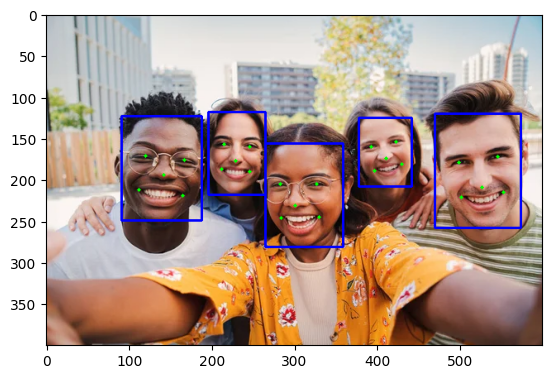

In [23]:
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        # Read the image and change color channels
        image = cv2.imread(os.path.join(folder_path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Detect faces and get landmarks
        boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)
        
        # Find and mark eye positions for each face
        for box, landmark in zip(boxes, landmarks):
            left_eye_pos = landmark[0]
            right_eye_pos = landmark[1]
            print(f'{filename}:')
            print('Left eye position: ', left_eye_pos)
            print('Right eye position: ', right_eye_pos)
            
            x1, y1, x2, y2 = box.astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            
            for x, y in landmark.astype(int):
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
        
        # Show the annotated images
        plt.imshow(image)
        plt.show()

In [ ]:
Landmarks are a set of numpy arrays containing the coordinates of specific points of the face. While detecting a face, the MTCNN model also determines the feature points (landmarks) within the detected region of the face. These feature points can be used for operations such as face recognition and facial feature extraction. The MTCNN model extracts 5 landmarks: left eye, right eye, nose tip, left mouth corner and right mouth corner.